# Forecasting Twilio Stock Performance

In [1]:
# Import libraries/packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import fbprophet

# Display figures inline in Jupyter notebook
%matplotlib inline

# Use seaborn's style defaults, set default figure size
sns.set(rc={'figure.figsize':(11,5)})

In [2]:
# Read in the data as a time series, with date as the index and in Datetime type
df = pd.read_csv('data/HistoricalQuotes.csv', index_col=0, parse_dates=True)

In [3]:
# Inspect first 3 rows of dataframe
df.head(3)

,close,volume,open,high,low
date,,,,,
2019-01-17 16:00:00,102.11,"4,609,369",100.19,104.12,99.23
2019-01-17 00:00:00,102.11,4628778.0000,100.11,104.12,99.23
2019-01-16 00:00:00,99.97,4703804.0000,102.00,103.75,97.59


In [4]:
# Drop the first row withduplicate data
df = df.drop(df.index[0])

In [5]:
# Retain only the close value of the stock
df = df[['close']]

In [6]:
# Inspect first 3 rows of dataframe
df.head(3)

,close
date,
2019-01-17,102.11
2019-01-16,99.97
2019-01-15,100.45


Text(0,0.5,'USD ($)')

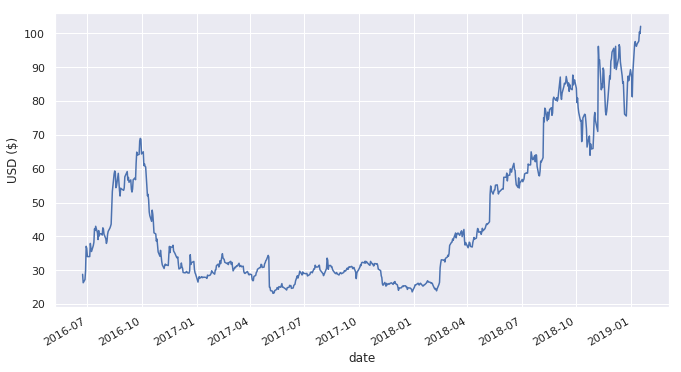

In [7]:
# Plot the full time series
df['close'].plot(figsize=(11,6))
plt.ylabel("USD ($)")

In [8]:
# Copy index (date) to the ds column
df['ds'] = df.index

In [9]:
# Apply Box-Cox transform to new 'y' column
#df['y'], lam = boxcox(df['close'])

In [10]:
# Inspect dataframe after transform
df.head()

,close,ds
date,,
2019-01-17,102.11,2019-01-17
2019-01-16,99.97,2019-01-16
2019-01-15,100.45,2019-01-15
2019-01-14,97.76,2019-01-14
2019-01-11,96.83,2019-01-11


In [11]:
# Visual inspect that the transformation removed much of the noise
#cols_plot = ['close', 'y']
#axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True);

## The Forecast

In [12]:
df.columns = ['y', 'ds']
df.head()

,y,ds
date,,
2019-01-17,102.11,2019-01-17
2019-01-16,99.97,2019-01-16
2019-01-15,100.45,2019-01-15
2019-01-14,97.76,2019-01-14
2019-01-11,96.83,2019-01-11


In [13]:
# Instantiate a Prophet object
m = fbprophet.Prophet()

# Fit a model to the historic data
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/cjohn033/miniconda3/envs/py3-learn/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [14]:
# Create dataframe for future values
future = m.make_future_dataframe(freq='B', periods=360)

# Forecast for the future
forecast = m.predict(future)

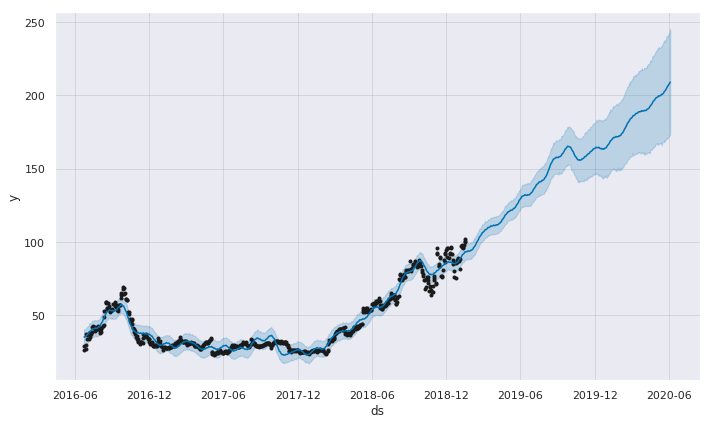

In [15]:
# Plot the forecast with Prophet's plot function
m.plot(forecast);

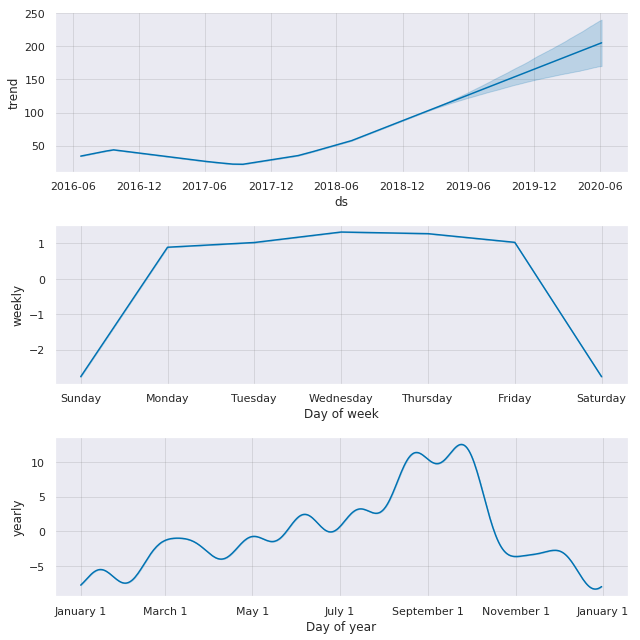

In [16]:
# Inspect forecast's components
m.plot_components(forecast);

In [21]:
# Inspect March 3, 2019 closing price forecast
forecast[forecast['ds'] == '2019-03-01'].yhat

677    106.511807
Name: yhat, dtype: float64

In [18]:
# Inspect the last few days' forecast
forecast[['ds','yhat']].tail()

,ds,yhat
1002,2020-05-29,206.297733
1003,2020-06-01,207.499609
1004,2020-06-02,208.027390
1005,2020-06-03,208.683620
1006,2020-06-04,208.962025


In [26]:
# List dates to check manually
dates_list = ['2019-01-23', '2019-01-30', '2019-02-06']
for date in dates_list:
    print(forecast[forecast['ds'] == date].yhat)

650    93.919257
Name: yhat, dtype: float64
655    94.361259
Name: yhat, dtype: float64
660    96.111183
Name: yhat, dtype: float64
